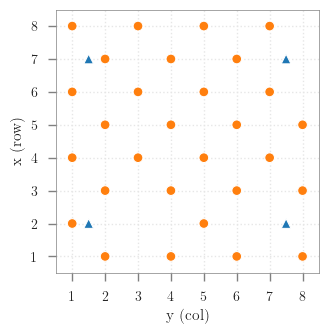

In [1]:
%run rutgers-base.ipynb

Describe link


,rssi,seq,noise,srcRow,srcCol,dstRow,dstCol,rss,d,meanRSSI,medianRSSI,stdRSSI,PRR,PRR+1
count,300.000,300.000,300.0,300.0,300.0,300.0,300.0,300.000,3.000e+02,291.000,291.000,291.000,291.000,290.000
mean,2.823,149.500,0.0,2.0,1.0,7.0,6.0,-92.177,7.071e+00,2.814,3.057,1.550,0.783,0.783
std,1.678,86.747,0.0,0.0,0.0,0.0,0.0,1.678,3.559e-14,0.657,0.951,0.502,0.159,0.159
min,0.000,0.000,0.0,2.0,1.0,7.0,6.0,-95.000,7.071e+00,0.900,0.000,0.316,0.300,0.300
25%,2.000,74.750,0.0,2.0,1.0,7.0,6.0,-93.000,7.071e+00,2.350,3.000,1.350,0.700,0.700
50%,3.000,149.500,0.0,2.0,1.0,7.0,6.0,-92.000,7.071e+00,2.800,3.000,1.687,0.800,0.800
75%,4.000,224.250,0.0,2.0,1.0,7.0,6.0,-91.000,7.071e+00,3.300,4.000,1.897,0.900,0.900
max,6.000,299.000,0.0,2.0,1.0,7.0,6.0,-89.000,7.071e+00,4.000,4.000,2.378,1.000,1.000


Link last N samples


,rssi,received,error,seq,noise,src,dst,srcRow,srcCol,dstRow,dstCol,rss,d,meanRSSI,medianRSSI,stdRSSI,PRR,PRR+1
360595,4,True,False,295,0,"(2.0, 1.0)","(7.0, 6.0)",2.0,1.0,7.0,6.0,-91.0,7.071,3.5,4.0,0.707,1.0,NaN
360596,4,True,False,296,0,"(2.0, 1.0)","(7.0, 6.0)",2.0,1.0,7.0,6.0,-91.0,7.071,3.5,4.0,0.707,1.0,NaN
360597,4,True,False,297,0,"(2.0, 1.0)","(7.0, 6.0)",2.0,1.0,7.0,6.0,-91.0,7.071,3.5,4.0,0.707,1.0,NaN
360598,3,True,False,298,0,"(2.0, 1.0)","(7.0, 6.0)",2.0,1.0,7.0,6.0,-92.0,7.071,3.4,3.5,0.699,1.0,NaN
360599,3,True,False,299,0,"(2.0, 1.0)","(7.0, 6.0)",2.0,1.0,7.0,6.0,-92.0,7.071,3.4,3.5,0.699,1.0,NaN


Link info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 360300 to 360599
Data columns (total 18 columns):
rssi          300 non-null uint8
received      300 non-null bool
error         300 non-null bool
seq           300 non-null int64
noise         300 non-null int8
src           300 non-null object
dst           300 non-null object
srcRow        300 non-null float64
srcCol        300 non-null float64
dstRow        300 non-null float64
dstCol        300 non-null float64
rss           300 non-null float64
d             300 non-null float64
meanRSSI      291 non-null float64
medianRSSI    291 non-null float64
stdRSSI       291 non-null float64
PRR           291 non-null float64
PRR+1         290 non-null float64
dtypes: bool(2), float64(11), int64(1), int8(1), object(2), uint8(1)
memory usage: 36.3+ KB


None

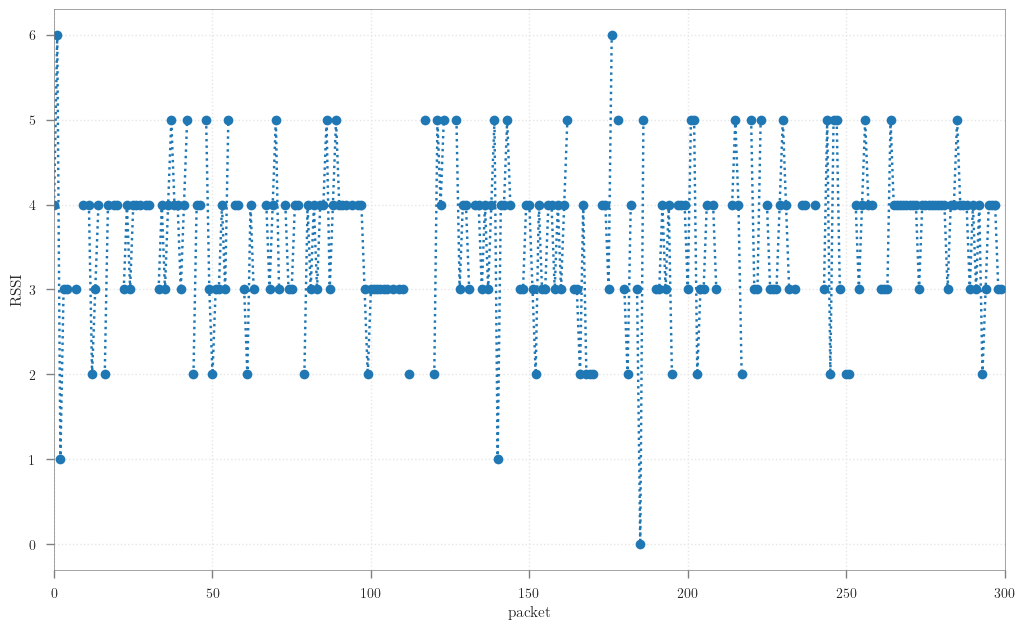

In [14]:
def show_sample_link():
    df = produce_dataset()
    link = df.loc[(df.src==(2,1)) & (df.dst==(7,6)) & (df.noise==0)].copy()

    print('Describe link')
    display(link.describe())
    
    print('Link last N samples')
    display(link.tail())
    
    print('Link info')
    display(link.info())

    link.loc[~link.received, 'rssi'] = np.nan

    latexify(columns=2, scale=1.5)
    f, ax = plt.subplots()
    ax.plot('seq', 'rssi', linestyle=':', marker='o', data=link)
    ax.set_xlim(0, 300)
    ax.set_ylabel('RSSI')
    ax.set_xlabel('packet')
    ax.grid()
    format_axes(ax)

    plt.show()
    plt.close(f)
    
show_sample_link()

In [15]:
labels = ('good', 'interm.', 'bad')

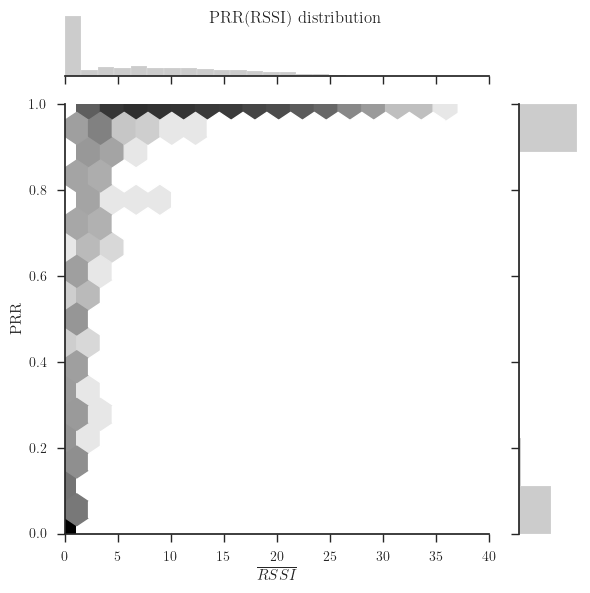

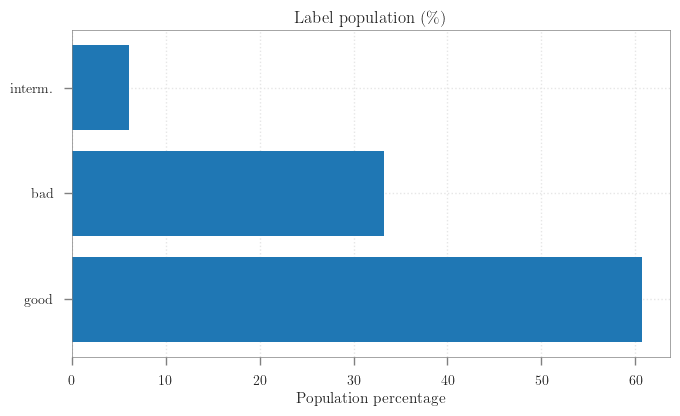

In [25]:
def dataset_stats():
    from collections import Counter

    def set_class(value):
        if np.isnan(value): return None
        if value >= 0.9: return 'good'
        if value <= 0.1: return 'bad'
        return 'interm.'

    def ratio(x): return x.sum() / len(x.index)

    latexify(columns=2)
    
    df = produce_dataset()
    
    data = df.groupby(['src', 'dst', 'noise'], as_index=False) \
        .agg({'rssi': ['mean', 'std'], 'received': ratio})

    # Merge multiindex column names
    data.columns = data.columns.map('|'.join).str.strip('|')

    # Add labels according to common pattern
    data['label'] = data['received|ratio'].apply(set_class)

    with sns.axes_style('ticks'):
        g = sns.jointplot(
            data=data, 
            x='rssi|mean', 
            y='received|ratio',
            color='.5',
            kind='hexbins',
            bins='log',
            xlim=(0, df['rssi'].max()),
            ylim=(0, 1),
            space=0
        )
        g.set_axis_labels('$\overline{RSSI}$', 'PRR')
        g.fig.suptitle('PRR(RSSI) distribution')

    classes = data['label'].dropna()

    c = Counter(classes)

    values = sum(c.values())
    for key in c.keys(): # Normalize
        c[key] /= values
        c[key] *= 100


    f, ax = plt.subplots()
    ax.barh(list(c.keys()), list(c.values()))
    ax.set_title('Label population (\%)')
    
    ax.set_xlabel('Population percentage')
    ax.grid()
    format_axes(ax)
    plt.show(f)
    plt.close(f)
    
    
dataset_stats()